# Clasificación. Parte I - Clasificación binaria.

Los sistemas de aprendizaje automático **supervisados** más comunes son los de **regresión**, que predicen <u>valores</u>, y los de **clasificación**, que predicen <u>clases</u>.

Trabajaremos con el dataset **MNIST** (Modified National Institute of Standars and Technology).

Se trata de un conjunto de datos tan usado con fines didácticos que se incluye por defecto en algunos paquetes con ScikitLearn.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Carga de datos

In [32]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)

## Exploración y visualización de los datos

El dataset `MNIST` contiene $70000$ imágenes de dígitos manuscritos. Con `fetch_openml()`, los datos se cargan en un diccionario.  

In [33]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [34]:
# Claves del diccionario

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [35]:
# Descripción del dataset

mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [36]:
# Guardar la descripción del dataset en un fichero para verlo bien

with open("mnist_description.md", "w", encoding="utf-8") as f: # w: como escritura
  f.write(mnist["DESCR"])

In [37]:
# Imágenes

mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# ¿Es un array de NumPy? ¿Un DataFrame de Pandas? ¿Otro?

type(mnist["data"])

pandas.core.frame.DataFrame

In [39]:
# Este campo son las etiquetas

mnist["target"]

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [40]:
X = mnist["data"]
y = mnist["target"]

In [41]:
# Tomamos un elemento cualquiera, por ejemplo el elemento en la posición 55

print(y[55], end="\n\n") # Número del target

print(X.iloc[55]) # Vector de características, en este caso los píxeles de la imagen

8

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 55, Length: 784, dtype: int64


En la fila 55 encontramos que nuestro dígito es el $9$.

Cada fila de $X$ representa una imagen de $28 \times 28 \space (\sqrt{784})$

In [42]:
784 ** 0.5

28.0

In [43]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Los píxeles tienen un valor entre 0 y 255 según la intensidad.

In [44]:
# Pintamos la fila 55

example_digit = X.iloc[55].to_numpy()
example_digit_image = example_digit.reshape(28, 28)

print("Dígito en una línea de 784 elementos: \n", example_digit)
print("Dígito en 28 filas por 28 columnas: \n", example_digit_image)

Dígito en una línea de 784 elementos: 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  29 130 130 225 255 255 109   7 116 243 200   6   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   8  95 217 253 253 253 253 253 253
 253 253 253 248  11   0   0   0   0   0   0   0   0   0   0   0   0   0
  27 213 25

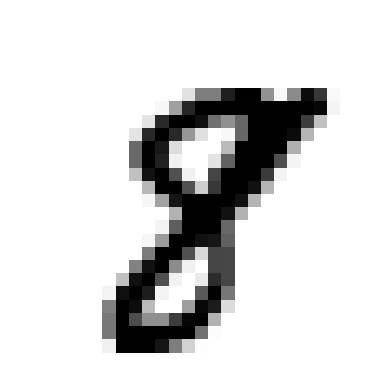

In [45]:
plt.imshow(example_digit_image, cmap="binary") # cmap: Esquema de color
plt.axis("off")
plt.show()

Número: 3



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

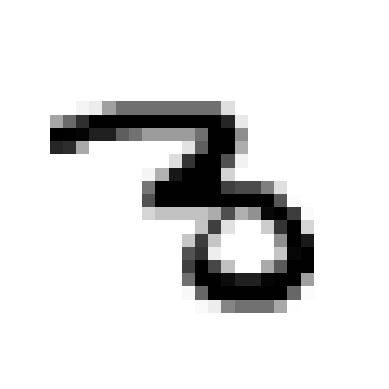

In [46]:
# Probamos con otra fila, por ejemplo la 30

example_digit = X.iloc[30].to_numpy()
example_digit_image = example_digit.reshape(28, 28)

print("Número:", y[30], end="\n\n")
plt.imshow(example_digit_image, cmap="binary")
plt.axis("off")
plt

In [47]:
print(type(y))
y.describe()

<class 'pandas.core.series.Series'>


,class
count,70000
unique,10
top,1
freq,7877


Vamos a convertir el target en un array de NumPy de números enteros.

In [48]:
y = y.to_numpy().astype(np.uint8) # Entero sin signo de 8 bits
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

## Creación del conjunto de datos de entrenamiento y datos de prueba.

El dataset MNIST viene preparado de tal forma que las primeras $60000$ imágenes son de entrenamiento y las últimas $10000$ son para hacer pruebas.

In [49]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Entrenamiento del modelo (clasificador binario)

En esta primera versión, vamos a crear un clasificador binario, que distinga si un dígito tiene un valor de $5$ o no.

In [50]:
y_train_5 = (y_train == 5) # Tendremos un vector de valores booleanos, siendo True si el número equivale a 5
y_train_5

array([ True, False, False, ...,  True, False, False])

Vamos a utilizar el algoritmo *Stochastic Gradient Descent* que hace bien la clasificación cuando hay grandes volúmenes de datos.

In [51]:
from sklearn.linear_model import SGDClassifier

mnist_sgd_model = SGDClassifier()
mnist_sgd_model.fit(X_train, y_train_5)

SGDClassifier()

Vamos a comprobar si el modelo puede predecir bien dos ejemplos.

Funciona correctamente aunque no pasemos el valor a un array de NumPy.

In [52]:
mnist_sgd_model.predict([X_train.iloc[55], X_train.iloc[30], X_train.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False, False, False])

Efectivamente, los dos primeros valores no son el dígito $5$ mientras que el primer valor del vector de entrenamiento sí.

## Rendimiento del modelo

### Aciertos y fallos

Usaremos los datos de prueba para hacer predicciones y comprobamos si son correctas.

In [53]:
y_test_pred = mnist_sgd_model.predict(X_test)

Tenemos que formatear `y_test` para que también sea un vector de `True` o `False`

In [54]:
y_test = (y_test == 5)

In [55]:
print("Número de aciertos:", (y_test_pred == y_test).sum()) # Número de valores que cumplen la condición
print("Número de fallos:", (y_test_pred != y_test).sum())
print()
print("Porcentaje de aciertos:", round((y_test_pred == y_test).sum() / len(y_test) * 100, 2), "%")
print("Porcentaje de fallos:", round((y_test_pred != y_test).sum() / len(y_test) * 100, 2), "%")

Número de aciertos: 9612
Número de fallos: 388

Porcentaje de aciertos: 96.12 %
Porcentaje de fallos: 3.88 %


Vemos alguno de los fallos que ha tenido nuestro modelo.

In [56]:
valores_totales = (y_test == y_test_pred)

indices_fallos = np.where(valores_totales == False)
indices_fallos

(array([   7,    8,   45,   52,   84,  120,  129,  132,  153,  165,  187,
         207,  211,  219,  240,  340,  344,  352,  395,  406,  412,  432,
         469,  478,  502,  645,  674,  720,  739,  751,  766,  791,  812,
         827,  857,  938,  955, 1003, 1014, 1032, 1046, 1082, 1089, 1115,
        1169, 1202, 1233, 1235, 1243, 1252, 1258, 1285, 1289, 1299, 1331,
        1339, 1378, 1393, 1406, 1421, 1447, 1466, 1467, 1476, 1525, 1635,
        1637, 1641, 1653, 1670, 1684, 1709, 1755, 1879, 1910, 1917, 1931,
        1970, 1999, 2001, 2035, 2037, 2040, 2063, 2073, 2100, 2113, 2125,
        2162, 2192, 2214, 2215, 2224, 2279, 2282, 2291, 2313, 2320, 2322,
        2369, 2460, 2515, 2525, 2526, 2545, 2556, 2558, 2559, 2573, 2586,
        2597, 2604, 2611, 2616, 2639, 2644, 2668, 2670, 2689, 2695, 2698,
        2727, 2810, 2832, 2850, 2909, 2919, 2925, 2939, 2951, 2956, 2970,
        2987, 3093, 3100, 3102, 3115, 3117, 3157, 3171, 3183, 3199, 3275,
        3334, 3336, 3372, 3408, 3414, 

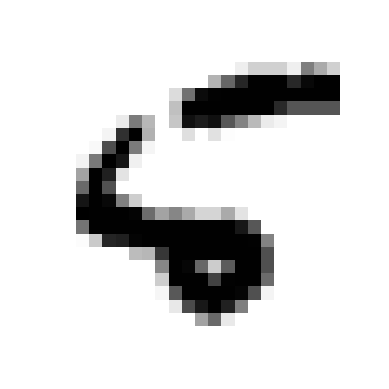

In [57]:
digito = X_test.iloc[8].to_numpy()
digito_imagen = digito.reshape(28, 28)

plt.imshow(digito_imagen, cmap="binary")
plt.axis("off")
plt.show()

### Validación cruzada (cross validation)

En la validación cruzada, se dividen los datos de entrenamiento en varios grupos (probaremos con $3$ grupos)

In [58]:
from sklearn.model_selection import cross_val_score

cross_val_score(mnist_sgd_model, X_train, y_train_5, cv=3)

array([0.96195, 0.9617 , 0.9662 ])

Más del 90% en cada caso.

## Matriz de confusión

<img src="https://drive.google.com/uc?id=1-5Kc7JwXjCX6bts-5w5ylrn2U2XYX3n9"/>

Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias de la clase real.

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[9056   52]
 [ 336  556]]


Un dato de eficacia que se suele utilizar es la "presición del clasificador".

$precission = \frac{TP}{TP+FP}$

In [60]:
# Precision del clasificador

precission = (cm[0][0] / (cm[0][0] + cm[0][1]))
print(precission)
print("Precisión del clasificador:", round(precission * 100, 3))

0.9942907334211682
Precisión del clasificador: 99.429


Otro dato que se usa es el llamado *recall* (sensibilidad o ratio de verdaderos positivos).

$recall = \frac{TP}{TP+FN}$

In [61]:
recall = (cm[0][0] / (cm[0][0] + cm[1][0]))

print(recall)
print("Recall del clasificador:", round(recall * 100, 3))

0.9642248722316865
Recall del clasificador: 96.422
